* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1= 생존
* pclass: 티켓의 선실 등급, 1=일등석, 2=이등석, 3=삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C=Cherbourg, Q=Queenstown, S=Southampton

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 일반적인 X축과 y축 꺾은선 혹은 bar
import seaborn as sns # 통계적 graph

import warnings
warnings.filterwarnings('ignore')

In [2]:
titan_df = pd.read_csv('./titanic/train.csv')
titan_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
print('\n ### 학습데이터 정보 ### \n')
print(titan_df.info())


 ### 학습데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
## 결측값 확인 및 대체(imputation) cf)데이터를 만드는 방법 ::  데이터 증강
                                   ##                          augementation

titan_df['Age'].fillna(titan_df['Age'].mean(), inplace=True)
titan_df['Cabin'].fillna('N', inplace=True)
titan_df['Embarked'].fillna('N', inplace=True)

print('데이터 na개수', titan_df.isnull().sum().sum())

데이터 na개수 0


#### 가설1.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

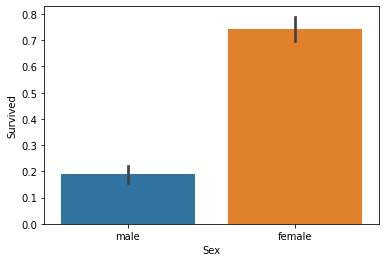

In [5]:
### 성별에 따른 생존률의 차이가 있을까?
sns.barplot(x='Sex', y='Survived', data=titan_df)

In [6]:
### 성별에 따른 생존률 확인
titan_df.groupby(by=['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
### 성별에 따른 생존률 계산
print('여성의 생존률:', np.round(233/(233+81),3))
print('남성의 생존률:', np.round(109/(109+468),3))

여성의 생존률: 0.742
남성의 생존률: 0.189


#### 가설2. 

In [8]:
### 부자와 가난한 사람들 중에서는 생존률이 어떨까? + 성별

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

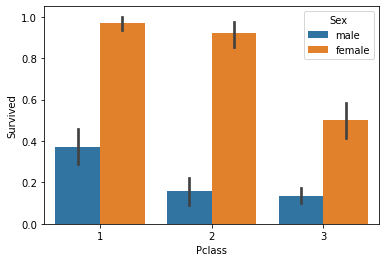

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titan_df)

#### 가설3. 

    0~5세는 Baby
    6~12세는 Child
    13~18세는 Teenager
    19~25세는 Student
    26~35세는 Young Adult
    36~60세는 Adult
    61세 이상은 Elderly
    
-1이하의 오류값은 Unknown으로 분류

In [10]:
### apply lambda
def get_cat(df):
    
    str1 = ''
    if df <=-1: str1='unknown'
    elif df <=5: str1='baby'
    elif df <=12: str1='child'
    elif df <=18: str1='teen'
    elif df <=25: str1='student'
    elif df <=35: str1='young_adult'
    elif df <=60: str1='adult'
    else: str1='elderly'
            
    return str1         

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

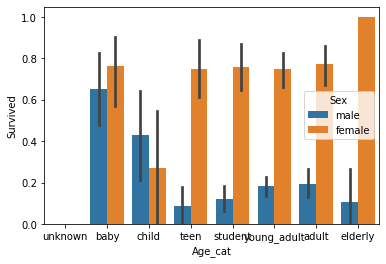

In [11]:
## apply lambda 적용
titan_df['Age_cat'] = titan_df['Age'].apply(lambda x : get_cat(x))

# X축을 순차적으로 표현하기 위함
group_names = ['unknown','baby','child','teen','student','young_adult',
              'adult','elderly']

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titan_df,
           order=group_names)

In [12]:
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Age_cat      891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [13]:
### Age_cat drop하자
titan_df = titan_df.drop('Age_cat', axis=1)

In [14]:
### 문자데이터를 숫자로 바꾼다.
titan_df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
### Label vs one_hot

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ftrs = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

for ftr in ftrs:
    le.fit(titan_df[ftr])
    titan_df[ftr]= le.transform(titan_df[ftr])


titan_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,3


In [16]:
### 불필요컬럼 제거 - id, Name, Ticket, Cabin 

titan_df = titan_df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [17]:
### 전처리가 완료된 titan_df 데이터
y_label = titan_df['Survived']
X_ftrs = titan_df.drop(["Survived"], axis=1)

In [18]:
### 데이터 분할을 해보자.

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_ftrs, y_label,
                                                 test_size=0.2,
                                                 random_state=11)

In [19]:
### 데이터 shape의 확인
print('X_train의 shape:', X_train.shape)
print('X_val의 shape:', X_val.shape)
print('y_train의 shape:', y_train.shape)
print('y_val의 shape:', y_val.shape)

X_train의 shape: (712, 7)
X_val의 shape: (179, 7)
y_train의 shape: (712,)
y_val의 shape: (179,)


In [20]:
### 알고리즘 - 분류 (의사결정나무, 랜덤포레스트, 로지스틱회귀

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [21]:
### 알고리즘 객체화

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

In [22]:
### 각 알고리즘별 학습/예측/평가
## dt_clf 학습
dt_clf.fit(X_train, y_train)
pred_dt = dt_clf.predict(X_val)
accuracy_dt = accuracy_score(y_val, pred_dt)
print('dt_clf의 정확도:', np.round(accuracy_dt,4))

dt_clf의 정확도: 0.7821


In [23]:
## rf_clf 학습
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_val)
accuracy_rf = accuracy_score(y_val, pred_rf)
print('rf_clf의 정확도:{0:.4f}'.format(accuracy_rf))

rf_clf의 정확도:0.8324


In [24]:
## lr_clf 학습
lr_clf.fit(X_train, y_train)
pred_lr = lr_clf.predict(X_val)
accuracy_lr = accuracy_score(y_val, pred_lr)
print('lr_clf의 정확도:{0:.4f}'.format(accuracy_lr))

lr_clf의 정확도:0.8547


In [36]:
### 결과값을 csv로 만들어 제출하기
result_df = pd.DataFrame(pred_lr)
result_df1 = result_df.rename(columns={0:'y_pred'})
result_df2 = result_df1.reset_index()
result_df2.to_csv('./220607.csv')

In [40]:
df_result = X_val.copy()
df_result['y_pred'] = pred_lr
df_result.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y_pred
431,3,0,29.699118,1,0,16.1000,3,1
821,3,1,27.000000,0,0,8.6625,3,0
629,3,1,29.699118,0,0,7.7333,2,0
626,2,1,57.000000,0,0,12.3500,2,0
665,2,1,32.000000,2,0,73.5000,3,0


In [41]:
### end of file